In [1]:
# Clustering of timeseries data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [35]:
df = pd.read_csv('./aggregate_products.csv')

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku_key,tran_date,sales,selling_price,avg_discount,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,28,2016-03-02,1,89.9,0.0,TY,06,063,20G
1,28,2016-03-03,0,89.9,0.0,TY,06,063,20G
2,28,2016-03-04,0,89.9,0.0,TY,06,063,20G
3,28,2016-03-05,0,89.9,0.0,TY,06,063,20G
4,28,2016-03-06,0,89.9,0.0,TY,06,063,20G


In [36]:
dummies = pd.get_dummies(df[['sku_department', 'sku_subdepartment', 'sku_category', 'sku_subcategory']])

df = df[['sku_key', 'tran_date', 'sales', 'selling_price']].join(dummies)

In [37]:
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [38]:
df['month'] = df['tran_date'].apply(lambda x: x.month)
df['day'] = df['tran_date'].apply(lambda x: x.day)
df['year'] = df['tran_date'].apply(lambda x: x.year)

In [39]:
df.head()

,sku_key,tran_date,sales,selling_price,month,day,year
0,28,2016-03-02,1,89.9,3,2,2016
1,28,2016-03-03,0,89.9,3,3,2016
2,28,2016-03-04,0,89.9,3,4,2016
3,28,2016-03-05,0,89.9,3,5,2016
4,28,2016-03-06,0,89.9,3,6,2016


In [40]:
df.shape

(1674162, 7)

In [41]:
limit = 50000

In [42]:
scale = MinMaxScaler()
skus = df['sku_key']
X = df.drop(['tran_date', 'day', 'month', 'year'], axis=1)
X.set_index('sku_key', inplace=True)
X[['sales', 'selling_price']] = scale.fit_transform(X[['sales', 'selling_price']])
X = X[:limit]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
X.shape

(50000, 5)

In [44]:
names = X.columns

## t-SNE

In [45]:
dimred = TSNE()

In [46]:
plot_df = dimred.fit_transform(X)

In [47]:
plot_df = pd.DataFrame(plot_df).join(df[:limit])

In [48]:
plot_df.head()

,0,1,sku_key,tran_date,sales,selling_price,month,day,year
0,-22.714689,-18.766584,28,2016-03-02,1,89.9,3,2,2016
1,-30.342461,-3.163586,28,2016-03-03,0,89.9,3,3,2016
2,-35.074852,-11.947023,28,2016-03-04,0,89.9,3,4,2016
3,-58.970985,-44.977913,28,2016-03-05,0,89.9,3,5,2016
4,-23.959530,62.756706,28,2016-03-06,0,89.9,3,6,2016


In [49]:
dimred.kl_divergence_

1.066220760345459

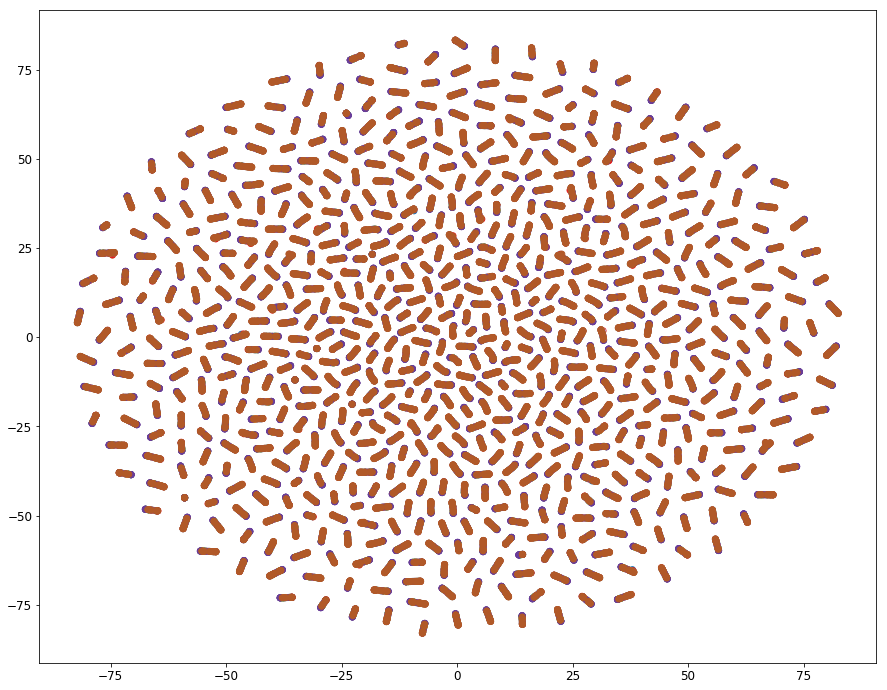

In [50]:
f, ax = plt.subplots(figsize=(15,12))

ax.scatter(plot_df[0], plot_df[1], c=plot_df['sku_key'], cmap='Paired')

In [51]:
plot_df['sku_key'].unique()

array([  28,   34,  100,  152,  182,  325,  521,  523,  527,  585,  586,
        588,  740,  806,  808,  810,  815,  920,  938,  985, 1134, 1259,
       1290, 1378, 1379, 1651, 1652, 1775, 1808, 1819, 1820, 1822, 1960,
       2166, 2188, 2420, 2421, 2422, 2423, 2440, 2441, 2443, 2444, 2671,
       2806, 2934, 3145, 3577, 3830, 4113, 4447, 4491, 4505, 4506, 4507,
       4508, 4606, 4727, 4728, 5242, 5491, 5728, 5729, 5731, 5736, 5779,
       5784, 5787, 5788, 5790, 5801, 5893, 5896, 5899, 5900, 5901],
      dtype=int64)

In [52]:
maping_dict = {}
for i, j in enumerate(plot_df['sku_key'].unique()):
    maping_dict[j] = i

In [53]:
skus = skus.map(maping_dict)[:limit]

In [54]:
skus = skus.astype(int)

In [55]:
len(skus.unique())

76

## Self Organizing Maps

In [23]:
from minisom import MiniSom

In [59]:
som = MiniSom(x=30, y=30, input_len=5, learning_rate=0.1)

In [60]:
X = X.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [61]:
som.random_weights_init(X)
som.train_random(X, 5000)

In [62]:
from pylab import bone, pcolor, colorbar, plot, show, figure, text

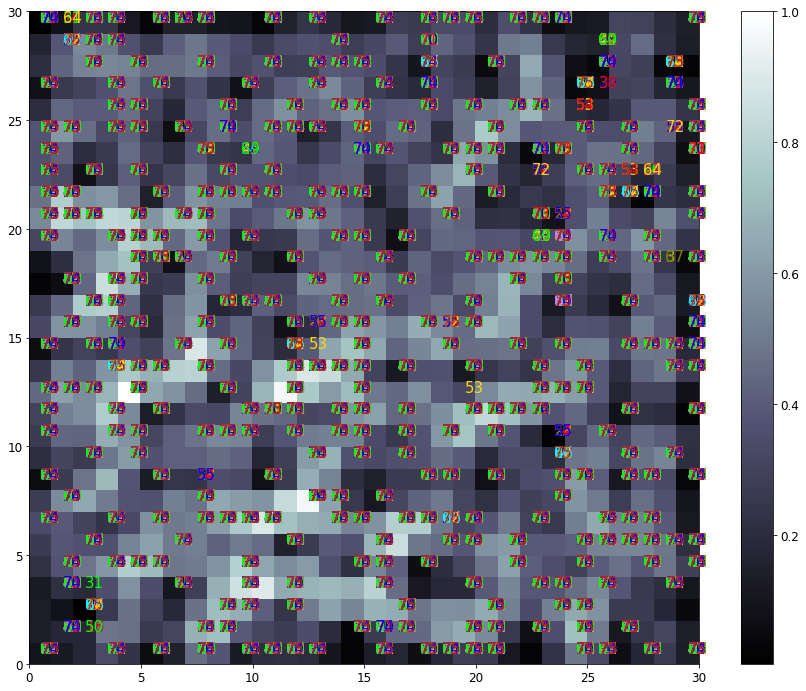

In [63]:
figure(figsize=(15,12))
bone()
pcolor(som.distance_map().T)
colorbar()

colors = ['r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',
          'r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',
          'r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',
          'r', 'b', 'g', 'y', 'tomato', 'c', 'm', 'gold',
          'cyan', 'skyblue', 'olive', 'orchid', 'lime',
          'navy', 'crimson', 'gold', 'red', 'blue', 'brown',]
wenners = []
for i, j in enumerate(X):
    
    w = som.winner(j)
    wenners.append(w)
    text(w[0] + 0.5,
         w[1] + 0.5,
         skus[i],
         color = colors[skus[i]],
         fontsize=15)
show()

## SOMPY implementation

In [64]:
from sompy.sompy import SOMFactory

In [80]:
sm = SOMFactory().build(X, normalization = 'var', initialization='random', component_names=names)
sm.train(n_job=1, verbose=False, train_rough_len=5, train_finetune_len=10)

In [81]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0; Quantization error = 0.44464365096619907


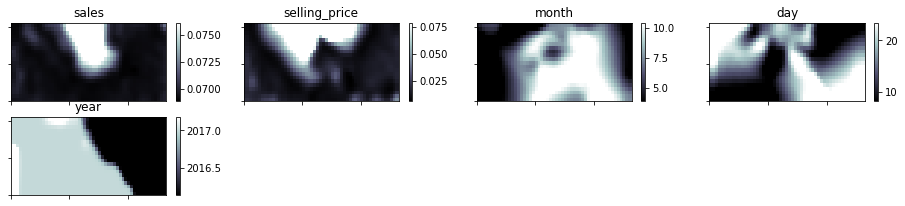

In [82]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"time-series",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", desnormalize=True)

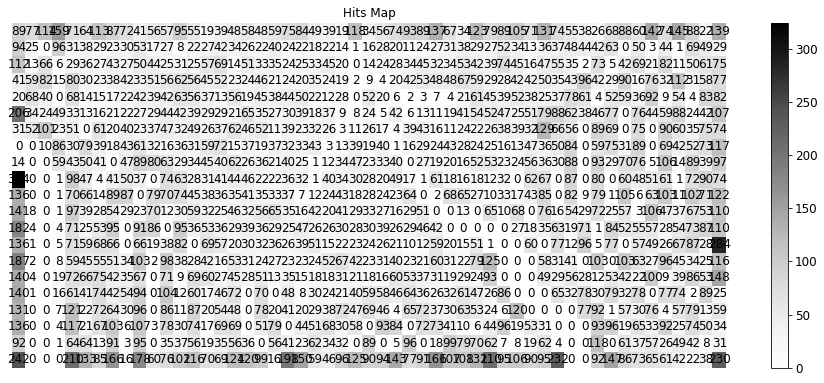

In [83]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(4,4,"Hits Map",text_size=12)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


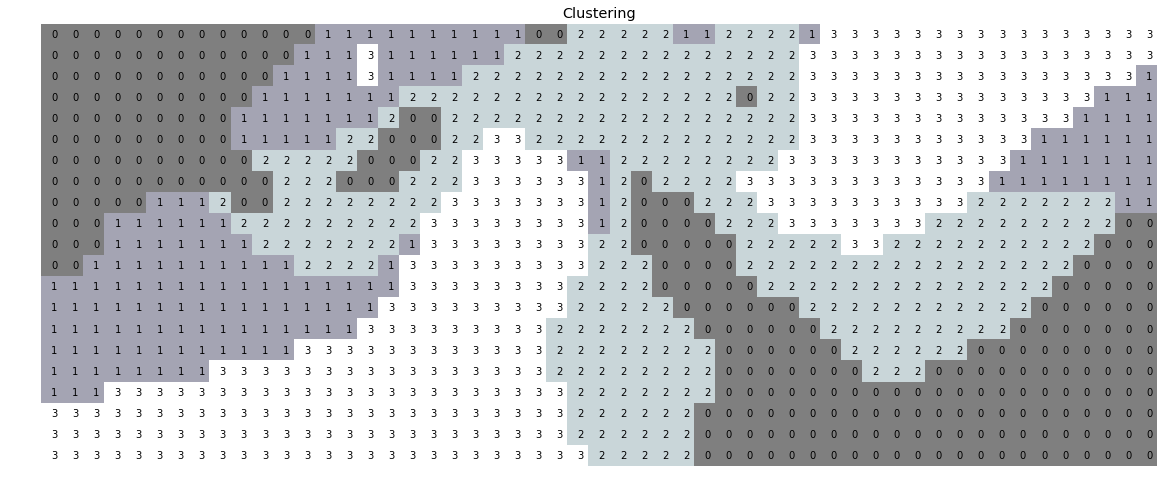

In [84]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(20,20,"Clustering",text_size=12)
a=hits.show(sm)

In [85]:
import sompy

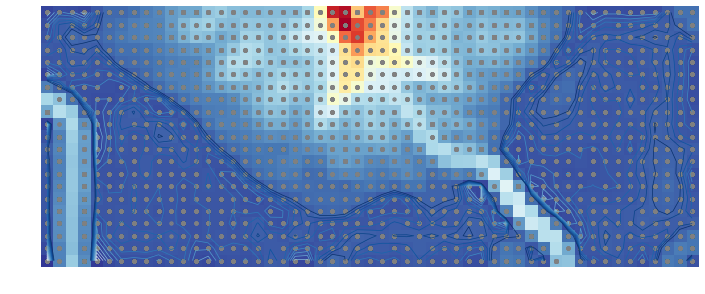

In [86]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
UMAT  = u.build_u_matrix(sm, distance=1, row_normalized=False)
UMAT = u.show(sm, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)